In [5]:
import pandas as pd

sales_data = pd.read_csv('/workspaces/machine-learning-python-template-ds-2023/Ricardo/Alternative-Time-Series/sales.csv')

sales_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [6]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data = sales_data.set_index('date')
time_series = sales_data['sales']

time_series.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

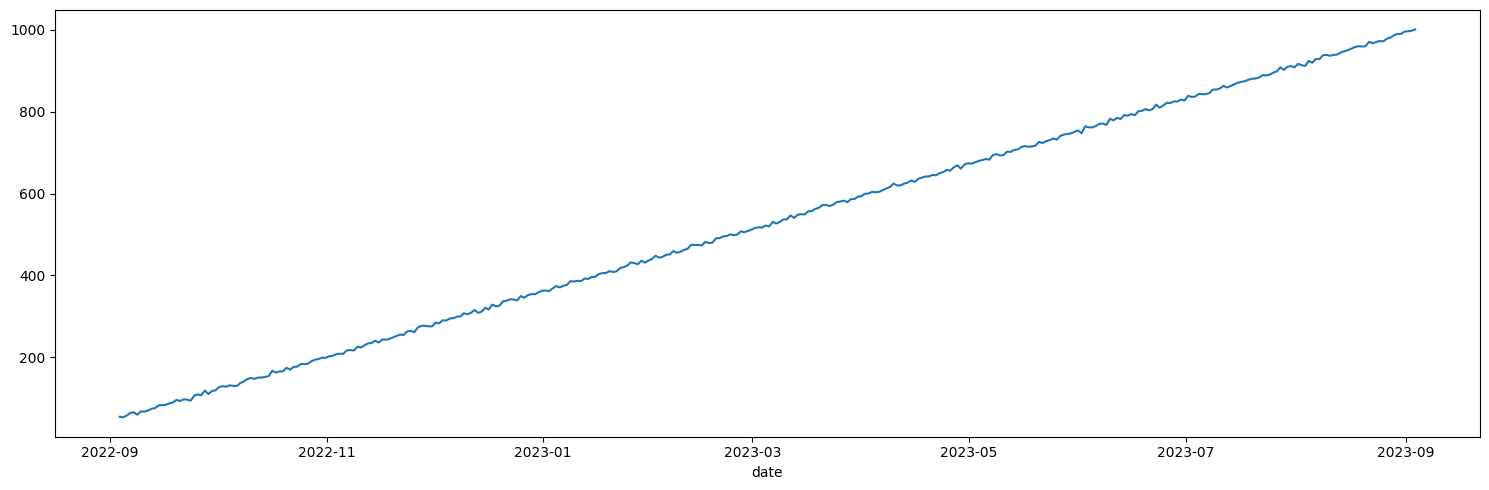

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize=(15, 5))

sns.lineplot(x=time_series.index, y=time_series.values)

plt.tight_layout()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

def adf_test(time_series):
    print('Augmented Dickey-Fuller Test:')
    adf_test = adfuller(time_series, autolag='AIC')
    adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '# Lags Used', '# Observations Used'])
    for key, value in adf_test[4].items():
        adf_output['Critical Value (%s)' % key] = value
    return adf_output

adf_test(time_series)

Augmented Dickey-Fuller Test:


Test Statistic            0.545414
p-value                   0.986190
# Lags Used              13.000000
# Observations Used     352.000000
Critical Value (1%)      -3.449065
Critical Value (5%)      -2.869786
Critical Value (10%)     -2.571163
dtype: float64

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(time_series, model='additive', period=30)

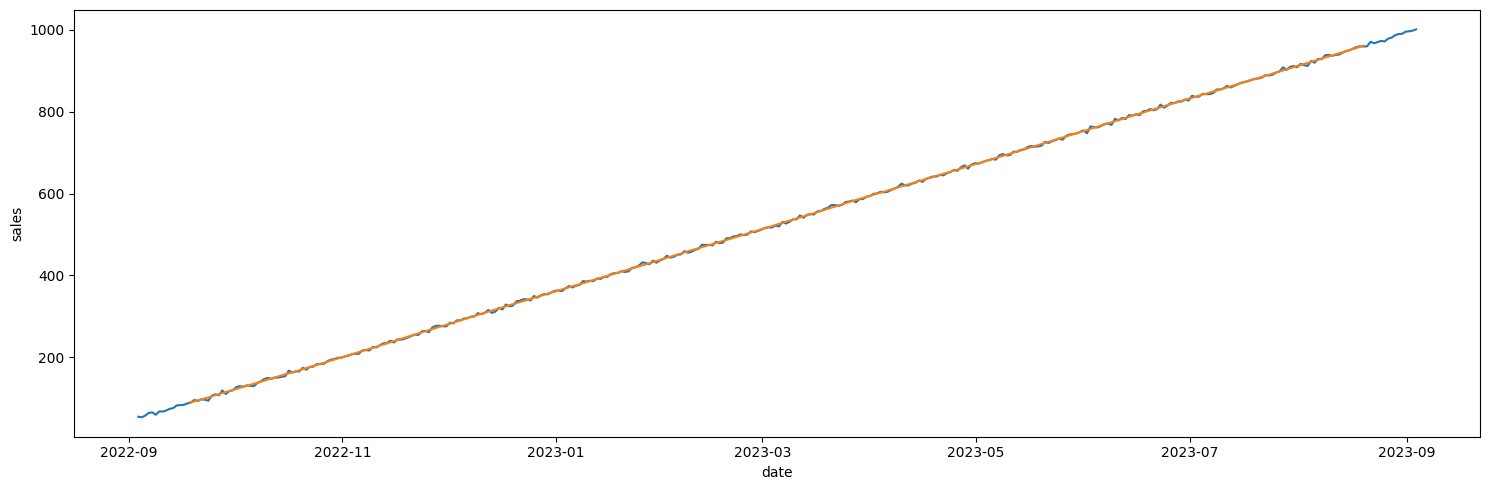

In [10]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize=(15, 5))

sns.lineplot(data=time_series)
sns.lineplot(data = trend)

plt.tight_layout()
plt.show()

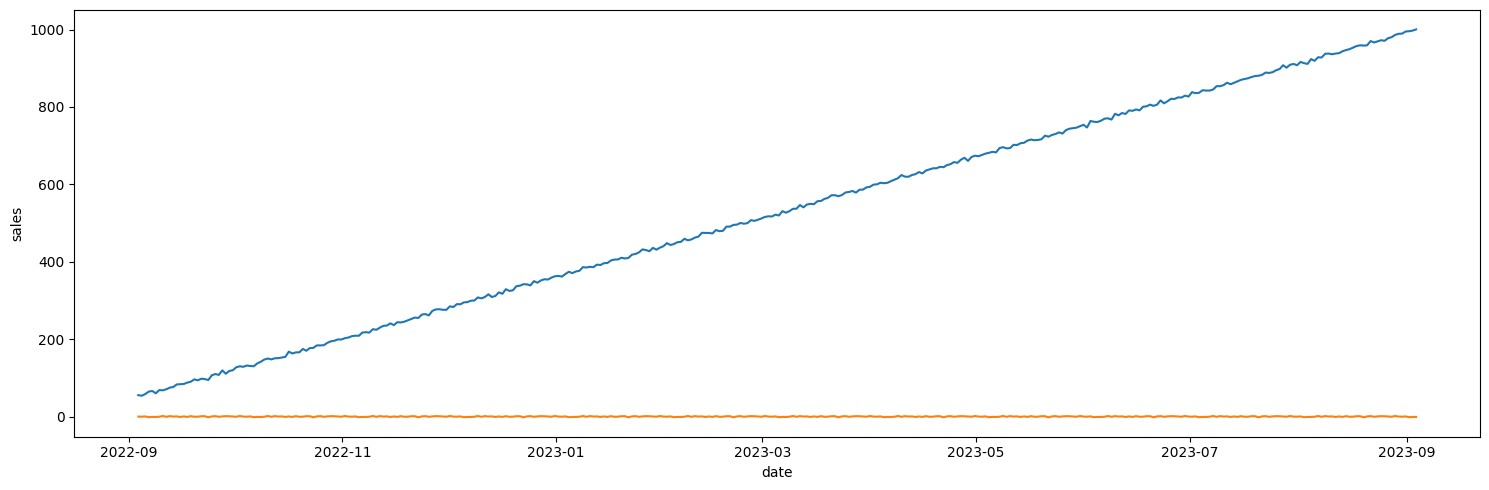

In [11]:
sesonal = decomposition.seasonal

fig, axis = plt.subplots(figsize=(15, 5))

sns.lineplot(data=time_series)
sns.lineplot(data = sesonal)

plt.tight_layout()
plt.show()

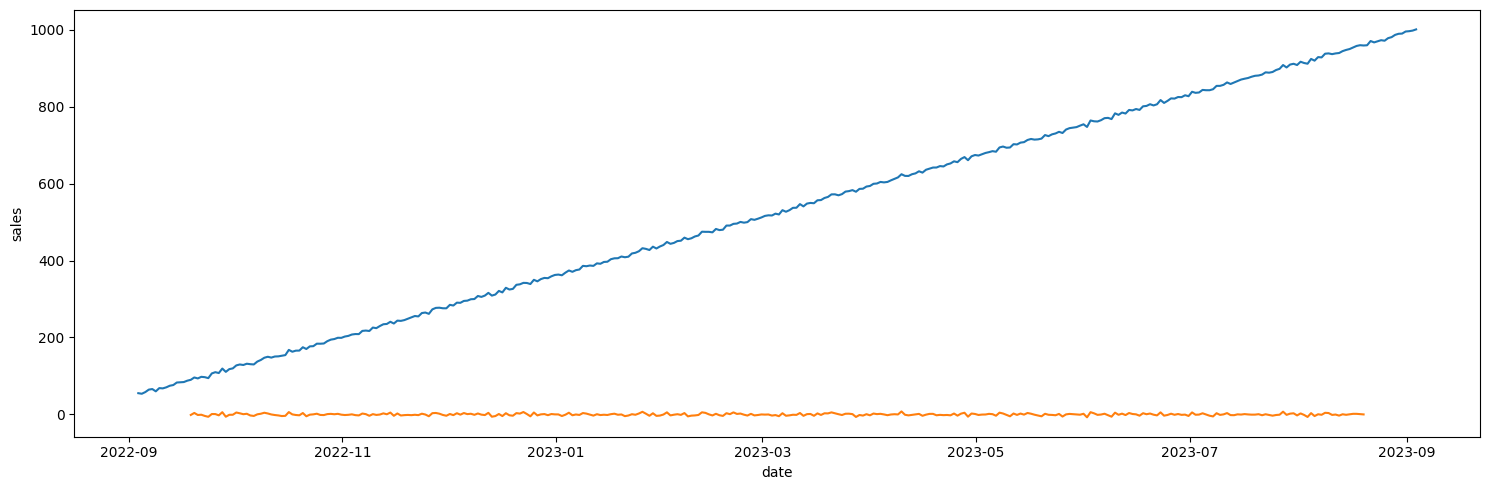

In [12]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize=(15, 5))

sns.lineplot(data=time_series)
sns.lineplot(data = residual)

plt.tight_layout()
plt.show()

In [16]:
from pmdarima import auto_arima

model = auto_arima(time_series, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.36 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.701 seconds


In [17]:
forecast = model.predict(n_periods=30)
forecast

2023-09-04 17:10:08.079328    1002.158148
2023-09-05 17:10:08.079328    1004.831669
2023-09-06 17:10:08.079328    1007.423289
2023-09-07 17:10:08.079328    1010.021630
2023-09-08 17:10:08.079328    1012.619419
2023-09-09 17:10:08.079328    1015.217254
2023-09-10 17:10:08.079328    1017.815084
2023-09-11 17:10:08.079328    1020.412915
2023-09-12 17:10:08.079328    1023.010746
2023-09-13 17:10:08.079328    1025.608577
2023-09-14 17:10:08.079328    1028.206409
2023-09-15 17:10:08.079328    1030.804240
2023-09-16 17:10:08.079328    1033.402071
2023-09-17 17:10:08.079328    1035.999902
2023-09-18 17:10:08.079328    1038.597733
2023-09-19 17:10:08.079328    1041.195564
2023-09-20 17:10:08.079328    1043.793395
2023-09-21 17:10:08.079328    1046.391226
2023-09-22 17:10:08.079328    1048.989057
2023-09-23 17:10:08.079328    1051.586888
2023-09-24 17:10:08.079328    1054.184719
2023-09-25 17:10:08.079328    1056.782550
2023-09-26 17:10:08.079328    1059.380381
2023-09-27 17:10:08.079328    1061

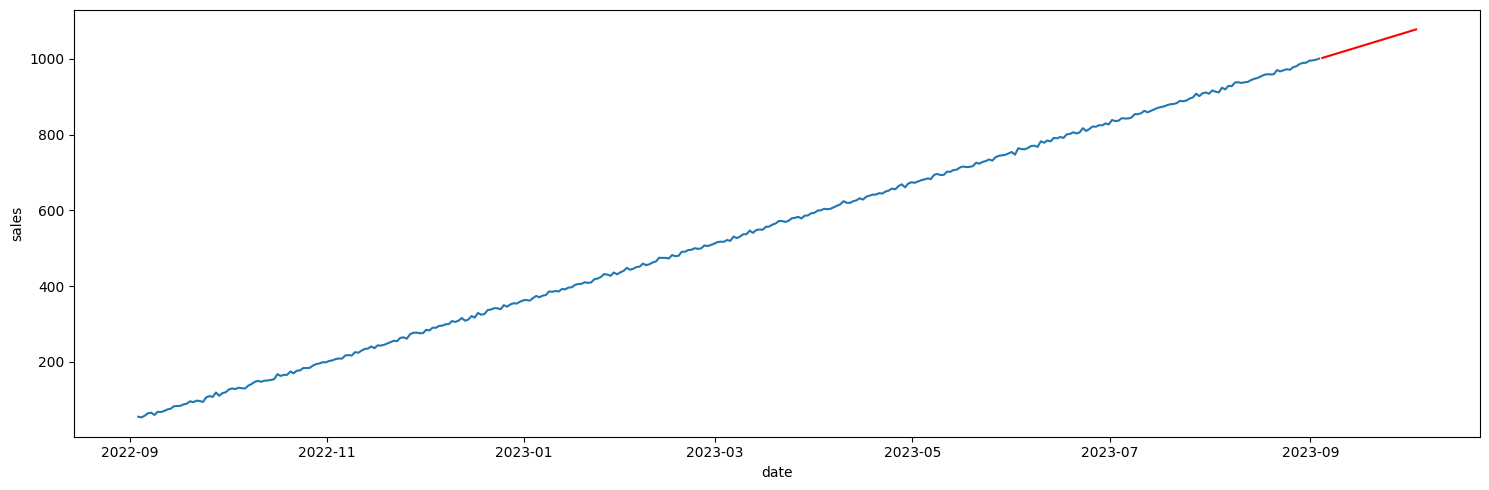

In [18]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(15, 5))

sns.lineplot(data = time_series)
sns.lineplot(data=forecast, c= 'red')

plt.tight_layout()
plt.show()